# Process all turtle XML files

In [1]:
#import of all tools

In [2]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

# Step 1 load xif data from jason file

![title]("img/picture.png")

In [3]:
#this Jasonfile is stockimg information on the pictures  took by drone (time, hour)

In [4]:
surveys = pd.read_json("G:/drone/surveys/images.json")

ValueError: Expected object or value

# extraction of coordonate thank to the jasonfile

In [4]:
def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)


surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]

In [5]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)

In [6]:
print (myProj)

In [7]:
    %matplotlib notebook
    #neds only 
    #mask = (surveys.latitude>-21.964) & (surveys.latitude<-21.954)
    #surveys = pd.DataFrame(surveys.loc[mask])
    surveys['BaseName']=surveys.SourceFile.apply(os.path.basename)
    surveys['BaseName']=surveys['BaseName'].str[0:-4]
    surveys['area']=surveys['BaseName'].str.split('_',expand=True)[0]

Extract the turtle position of mangrove bay

In [8]:
surveys

,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,CalibratedOpticalCenterY,CamReverse,...,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,BaseName,area
0,DJI Meta Data,-20.00,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-67.9,113.940256,-21.961719,803673.709436,7.568494e+06,mbay_20181013T073611_2090,mbay
1,DJI Meta Data,-52.27,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-60.3,113.940283,-21.961694,803676.633396,7.568497e+06,mbay_20181015T073417_3634,mbay
2,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-72.0,113.931967,-21.958275,802824.387700,7.568892e+06,mbay_20181014T082933_3548,mbay
3,DJI Meta Data,16.94,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,105.9,113.935675,-21.961672,803200.423030,7.568509e+06,mbay_20181014T075841_3197,mbay
4,DJI Meta Data,17.04,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.2,113.934686,-21.962331,803096.826049,7.568438e+06,mbay_20181014T075241_3061,mbay
5,DJI Meta Data,16.74,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-71.7,113.936450,-21.959544,803285.039121,7.568743e+06,mbay_20181014T082754_3509,mbay
6,DJI Meta Data,16.94,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.3,113.936744,-21.961039,803312.293053,7.568577e+06,mbay_20181014T080454_3338,mbay
7,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-71.9,113.935169,-21.961058,803149.479628,7.568578e+06,mbay_20181014T080016_3230,mbay
8,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-72.1,113.933831,-21.960681,803011.911317,7.568622e+06,mbay_20181014T080046_3242,mbay
9,DJI Meta Data,16.94,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.3,113.930678,-21.961194,802684.989926,7.568571e+06,mbay_20181014T075111_3026,mbay


In [9]:
surveys.BaseName.str.contains('neds').max()

True

In [10]:
files = glob.glob(r'G:\drone\surveys\survey_11\*.xml',recursive=True)
len(files)

17

In [11]:
turtles =pd.DataFrame(files,columns=['path'])
turtles['BaseName']=turtles.path.apply(os.path.basename)
turtles['BaseName']=turtles['BaseName'].str[0:-4]
turtles =turtles.merge(surveys,on=['BaseName'])
turtles

,path,BaseName,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,G:\drone\surveys\survey_11\tbay_20180118T15203...,tbay_20180118T152032_0010,DJI Meta Data,130.06,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-173.9,113.881258,-22.103758,797279.518180,7.552874e+06,tbay
1,G:\drone\surveys\survey_11\tbay_20180118T15261...,tbay_20180118T152612_0128,DJI Meta Data,130.16,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,7.0,113.883144,-22.103611,797474.549065,7.552887e+06,tbay
2,G:\drone\surveys\survey_11\tbay_20180118T15261...,tbay_20180118T152617_0130,DJI Meta Data,130.26,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,6.8,113.883192,-22.103283,797480.112477,7.552923e+06,tbay
3,G:\drone\surveys\survey_11\tbay_20180118T15224...,tbay_20180118T152247_0056,DJI Meta Data,130.16,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-175.1,113.882003,-22.103781,797356.327829,7.552870e+06,tbay
4,G:\drone\surveys\survey_11\tbay_20180118T15224...,tbay_20180118T152244_0055,DJI Meta Data,130.16,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.3,113.882019,-22.103656,797358.310834,7.552884e+06,tbay
5,G:\drone\surveys\survey_11\tbay_20180118T15202...,tbay_20180118T152027_0008,DJI Meta Data,130.26,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.4,113.881303,-22.103436,797284.782700,7.552910e+06,tbay
6,G:\drone\surveys\survey_11\tbay_20180118T15215...,tbay_20180118T152151_0038,DJI Meta Data,130.36,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,6.9,113.881683,-22.103383,797324.182014,7.552915e+06,tbay
7,G:\drone\surveys\survey_11\tbay_20180118T15283...,tbay_20180118T152830_0178,DJI Meta Data,130.26,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,6.9,113.884011,-22.102725,797565.884708,7.552983e+06,tbay
8,G:\drone\surveys\survey_11\tbay_20180118T15203...,tbay_20180118T152030_0009,DJI Meta Data,130.16,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.4,113.881278,-22.103628,797281.799550,7.552889e+06,tbay
9,G:\drone\surveys\survey_11\tbay_20180118T15260...,tbay_20180118T152609_0127,DJI Meta Data,130.06,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,6.9,113.883125,-22.103742,797472.267514,7.552872e+06,tbay


<IPython.core.display.Javascript object>


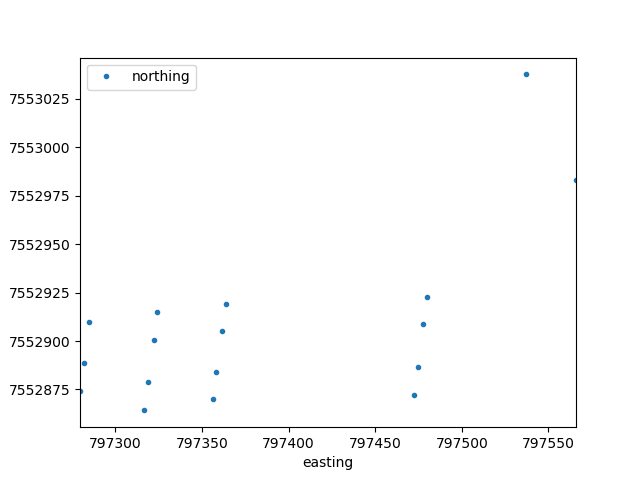

In [12]:
turtles.plot(x="easting",y="northing",marker =".",linestyle="")

In [13]:

def get_turtle_xy(path):
    #print(path)
    with open(path, "r") as f: # opening xml file
        content = f.read()
    soup = b(content, "lxml")
    x = [];
    y = [];
    opath =[]
    objtype = []
    for obj in soup.findAll("object"):
        objtype.append(obj.find('name').text)
        opath.append(path) 
        x.append((int(obj.find('xmin').text) +int(obj.find('xmax').text))/2)
        y.append((int(obj.find('ymin').text) +int(obj.find('ymax').text))/2)
    return pd.DataFrame({'path':opath,'x':x,'y':y,'type':objtype})
output =list(turtles.path.apply(get_turtle_xy))
output =pd.concat(output)
output['BaseName']=output.path.apply(os.path.basename)
output['BaseName']=output['BaseName'].str[0:-4]

In [14]:
output =output.merge(turtles,on=['BaseName'])
output

,path_x,x,y,type,BaseName,path_y,About,AbsoluteAltitude,AlreadyApplied,Aperture,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,G:\drone\surveys\survey_11\tbay_20180118T15203...,689.0,2731.5,diving turtle,tbay_20180118T152032_0010,G:\drone\surveys\survey_11\tbay_20180118T15203...,DJI Meta Data,130.06,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-173.9,113.881258,-22.103758,797279.518180,7.552874e+06,tbay
1,G:\drone\surveys\survey_11\tbay_20180118T15261...,1630.0,1441.5,diving turtle,tbay_20180118T152612_0128,G:\drone\surveys\survey_11\tbay_20180118T15261...,DJI Meta Data,130.16,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,7.0,113.883144,-22.103611,797474.549065,7.552887e+06,tbay
2,G:\drone\surveys\survey_11\tbay_20180118T15261...,1560.5,3392.0,turtle,tbay_20180118T152617_0130,G:\drone\surveys\survey_11\tbay_20180118T15261...,DJI Meta Data,130.26,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,6.8,113.883192,-22.103283,797480.112477,7.552923e+06,tbay
3,G:\drone\surveys\survey_11\tbay_20180118T15224...,2455.0,3427.0,diving turtle,tbay_20180118T152247_0056,G:\drone\surveys\survey_11\tbay_20180118T15224...,DJI Meta Data,130.16,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-175.1,113.882003,-22.103781,797356.327829,7.552870e+06,tbay
4,G:\drone\surveys\survey_11\tbay_20180118T15224...,2511.5,2756.5,turtle,tbay_20180118T152244_0055,G:\drone\surveys\survey_11\tbay_20180118T15224...,DJI Meta Data,130.16,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.3,113.882019,-22.103656,797358.310834,7.552884e+06,tbay
5,G:\drone\surveys\survey_11\tbay_20180118T15224...,2476.5,2486.0,diving turtle,tbay_20180118T152244_0055,G:\drone\surveys\survey_11\tbay_20180118T15224...,DJI Meta Data,130.16,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.3,113.882019,-22.103656,797358.310834,7.552884e+06,tbay
6,G:\drone\surveys\survey_11\tbay_20180118T15224...,2488.0,2428.5,diving turtle,tbay_20180118T152244_0055,G:\drone\surveys\survey_11\tbay_20180118T15224...,DJI Meta Data,130.16,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.3,113.882019,-22.103656,797358.310834,7.552884e+06,tbay
7,G:\drone\surveys\survey_11\tbay_20180118T15202...,874.5,797.0,turtle,tbay_20180118T152027_0008,G:\drone\surveys\survey_11\tbay_20180118T15202...,DJI Meta Data,130.26,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,-174.4,113.881303,-22.103436,797284.782700,7.552910e+06,tbay
8,G:\drone\surveys\survey_11\tbay_20180118T15215...,3379.0,3099.0,diving turtle,tbay_20180118T152151_0038,G:\drone\surveys\survey_11\tbay_20180118T15215...,DJI Meta Data,130.36,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,6.9,113.881683,-22.103383,797324.182014,7.552915e+06,tbay
9,G:\drone\surveys\survey_11\tbay_20180118T15215...,4207.5,2974.0,diving turtle,tbay_20180118T152151_0038,G:\drone\surveys\survey_11\tbay_20180118T15215...,DJI Meta Data,130.36,False,5.6,...,72,Centered,YCbCr4:2:2 (2 1),72,6.9,113.881683,-22.103383,797324.182014,7.552915e+06,tbay


In [15]:
output['rads']=np.deg2rad(output.FlightYawDegree)

In [16]:
output['dx']=((2432-output.x)/3666.666504)*output.RelativeAltitude
output['dy']=((1824-output.y)/3666.666504)*output.RelativeAltitude


In [268]:
    output['xx'] = output['dx'] * np.cos(output['rads']) +  output['dy'] * np.sin(output['rads'])
    output['xx'] =  output['easting'] + output['xx'] 
    output['yy'] = -output['dx'] * np.sin(output['rads']) + output['dy'] * np.cos(output['rads'])
    output['yy'] = output['northing'] + output['yy'] 

In [269]:
def get_path(item):
    return os.path.split(item)[0]


output['dir']=output['path_x'].apply(get_path)
turtles['dir']=turtles['path'].apply(get_path)

<IPython.core.display.Javascript object>


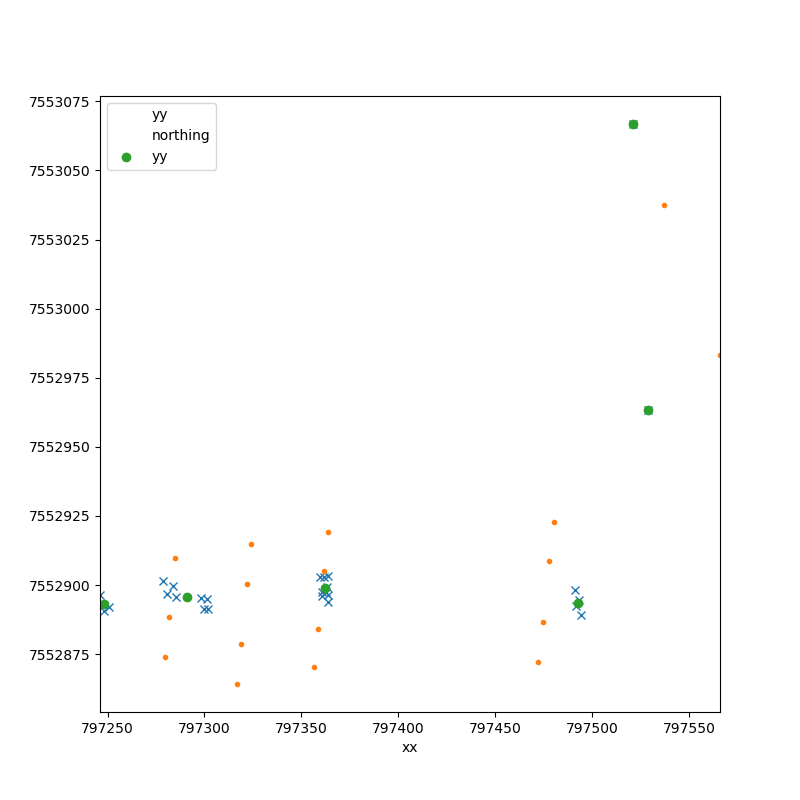

dir
G:\drone\surveys\survey_11    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

In [270]:
fig, ax = plt.subplots(figsize=(8,8))
output.groupby('dir').plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)
turtles.groupby('dir').plot(x='easting',y='northing',marker ='.',linestyle='',ax=ax)

In [271]:
output.index=pd.to_datetime(output.BaseName.str.split('_',expand=True)[1],format='%Y%m%dT%H%M%S')


In [272]:
output.groupby('path_x').count()

,x,y,type,BaseName,path_y,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,...,latitude,easting,northing,area,rads,dx,dy,xx,yy,dir
path_x,,,,,,,,,,,,,,,,,,,,,
G:\drone\surveys\survey_11\tbay_20180118T152027_0008.xml,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
G:\drone\surveys\survey_11\tbay_20180118T152030_0009.xml,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
G:\drone\surveys\survey_11\tbay_20180118T152032_0010.xml,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
G:\drone\surveys\survey_11\tbay_20180118T152144_0035.xml,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
G:\drone\surveys\survey_11\tbay_20180118T152146_0036.xml,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
G:\drone\surveys\survey_11\tbay_20180118T152149_0037.xml,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
G:\drone\surveys\survey_11\tbay_20180118T152151_0038.xml,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
G:\drone\surveys\survey_11\tbay_20180118T152239_0053.xml,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
G:\drone\surveys\survey_11\tbay_20180118T152241_0054.xml,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [273]:
output['time']= output.index

#test.groupby('dir').plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)

In [274]:
output.sort_index(inplace=True)

In [275]:
output['dxtime'] =output['time'].shift(-1) - output['time']

In [276]:
 output[output.duplicated(subset=['group','BaseName'], keep=False)]

KeyError: Index(['group'], dtype='object')

In [277]:
output['group']=0
output.loc[output['dxtime']> pd.to_timedelta(10,unit='s'),'group']=1
output['group'] =output['group'].shift(1)
output.loc[output['group'].isna(),'group']=0
output['group'] =output['group'].cumsum()
test =output.groupby('group').mean()
test.plot(x='xx',y='yy',marker ='o',linestyle='',ax=ax)

In [278]:
output

,path_x,x,y,type,BaseName,path_y,About,AbsoluteAltitude,AlreadyApplied,Aperture,...,area,rads,dx,dy,xx,yy,dir,time,dxtime,group
1,,,,,,,,,,,,,,,,,,,,,
2018-01-18 15:20:27,G:\drone\surveys\survey_11\tbay_20180118T15202...,874.5,797.0,turtle,tbay_20180118T152027_0008,G:\drone\surveys\survey_11\tbay_20180118T15202...,DJI Meta Data,130.26,False,5.6,...,tbay,-3.043854,31.857956,21.006819,797251.026883,7.552892e+06,G:\drone\surveys\survey_11,2018-01-18 15:20:27,00:00:03,0.0
2018-01-18 15:20:30,G:\drone\surveys\survey_11\tbay_20180118T15203...,783.0,1766.5,turtle,tbay_20180118T152030_0009,G:\drone\surveys\survey_11\tbay_20180118T15203...,DJI Meta Data,130.16,False,5.6,...,tbay,-3.043854,33.684574,1.174568,797248.161121,7.552891e+06,G:\drone\surveys\survey_11,2018-01-18 15:20:30,00:00:02,0.0
2018-01-18 15:20:32,G:\drone\surveys\survey_11\tbay_20180118T15203...,689.0,2731.5,diving turtle,tbay_20180118T152032_0010,G:\drone\surveys\survey_11\tbay_20180118T15203...,DJI Meta Data,130.06,False,5.6,...,tbay,-3.035128,35.557202,-18.513001,797246.129572,7.552896e+06,G:\drone\surveys\survey_11,2018-01-18 15:20:32,00:01:12,0.0
2018-01-18 15:21:44,G:\drone\surveys\survey_11\tbay_20180118T15214...,3505.5,424.5,turtle,tbay_20180118T152144_0035,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.26,False,5.6,...,tbay,0.125664,-21.957956,28.626138,797298.427336,7.552895e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:44,00:00:00,1.0
2018-01-18 15:21:44,G:\drone\surveys\survey_11\tbay_20180118T15214...,4491.0,249.0,turtle,tbay_20180118T152144_0035,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.26,False,5.6,...,tbay,0.125664,-42.115911,32.215911,797278.878250,7.552901e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:44,00:00:02,1.0
2018-01-18 15:21:46,G:\drone\surveys\survey_11\tbay_20180118T15214...,4383.5,1161.0,turtle,tbay_20180118T152146_0036,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.26,False,5.6,...,tbay,0.118682,-39.917047,13.561364,797280.875213,7.552897e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:46,00:00:00,1.0
2018-01-18 15:21:46,G:\drone\surveys\survey_11\tbay_20180118T15214...,3446.5,1318.0,turtle,tbay_20180118T152146_0036,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.26,False,5.6,...,tbay,0.118682,-20.751137,10.350000,797299.526062,7.552891e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:46,00:00:03,1.0
2018-01-18 15:21:49,G:\drone\surveys\survey_11\tbay_20180118T15214...,3402.5,2222.5,turtle,tbay_20180118T152149_0037,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.36,False,5.6,...,tbay,0.123918,-19.877605,-8.162005,797301.453363,7.552895e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:49,00:00:00,1.0
2018-01-18 15:21:49,G:\drone\surveys\survey_11\tbay_20180118T15214...,4291.5,2089.5,diving turtle,tbay_20180118T152149_0037,G:\drone\surveys\survey_11\tbay_20180118T15214...,DJI Meta Data,130.36,False,5.6,...,tbay,0.123918,-38.085943,-5.437923,797283.721349,7.552900e+06,G:\drone\surveys\survey_11,2018-01-18 15:21:49,00:00:02,1.0


In [279]:
#output.max()

In [280]:
#output.min()

In [88]:
test ['group'] = test.index
test

,x,y,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,CalibratedOpticalCenterY,...,longitude,latitude,easting,northing,rads,dx,dy,xx,yy,group
group,,,,,,,,,,,,,,,,,,,,,
0.0,62.333333,1999.000000,18.210000,False,4.500000,4.500000,8.0,3666.666504,2432.0,1824.0,...,113.935623,-21.963685,803190.786918,-2.431714e+06,-1.268854,31.667365,-2.338636,803202.432756,-2.431685e+06,0.0
1.0,3250.250000,1573.875000,18.160000,False,5.600000,5.600000,8.0,3666.666504,2432.0,1824.0,...,113.929571,-21.961969,802568.947352,-2.431512e+06,-1.268854,-10.923471,3.327580,802562.521944,-2.431522e+06,1.0
2.0,1719.625000,1878.375000,18.110000,False,5.600000,5.600000,8.0,3666.666504,2432.0,1824.0,...,113.933388,-21.962582,802962.157383,-2.431588e+06,1.862703,9.500492,-0.725165,802958.727271,-2.431596e+06,2.0
3.0,3200.250000,1570.875000,18.085000,False,5.000000,5.000000,8.0,3666.666504,2432.0,1824.0,...,113.934658,-21.962943,803092.654234,-2.431630e+06,1.864448,-10.235677,3.349176,803098.822868,-2.431621e+06,3.0
4.0,1947.000000,633.250000,18.160000,False,4.500000,4.500000,8.0,3666.666504,2432.0,1824.0,...,113.936506,-21.963462,803282.453068,-2.431691e+06,1.851794,6.474573,15.901323,803295.922452,-2.431702e+06,4.0
5.0,2946.250000,1932.437500,18.210000,False,4.500000,4.500000,8.0,3666.666504,2432.0,1824.0,...,113.936344,-21.962952,803266.816051,-2.431634e+06,-1.270382,-6.869786,-1.462532,803266.180771,-2.431641e+06,5.0
6.0,1796.000000,1538.333333,18.076667,False,5.000000,5.000000,8.0,3666.666504,2432.0,1824.0,...,113.936238,-21.962452,803256.946559,-2.431579e+06,1.860521,8.479937,3.778846,803258.145293,-2.431588e+06,6.0
7.0,2414.625000,1618.375000,18.135000,False,5.000000,5.000000,8.0,3666.666504,2432.0,1824.0,...,113.936456,-21.962047,803280.367243,-2.431534e+06,-1.268854,0.231467,2.746705,803277.813630,-2.431533e+06,7.0
8.0,2341.500000,2186.750000,18.690000,False,5.600000,5.600000,8.0,3666.666504,2432.0,1824.0,...,113.934740,-21.960150,803107.055790,-2.431321e+06,1.860521,1.207568,-4.836433,803102.073802,-2.431321e+06,8.0


In [125]:


df = test [['group','xx','yy']]




    



In [126]:
from sklearn.preprocessing import StandardScaler
features = ['group', 'xx', 'yy']
# Separating out the features
x = df.loc[:, features].values
y = df.loc[:,['group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [127]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaled_data = preprocessing.scale(df)
pca = PCA()
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data




In [128]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [129]:
pca_df = pd.DataFrame(pca_data, index=[*df['xx'], *df['yy']], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

ValueError: Shape of passed values is (63, 3), indices imply (126, 3)

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [131]:
finalDf = pd.concat([principalDf, df[['group']]], axis = 1)

<IPython.core.display.Javascript object>


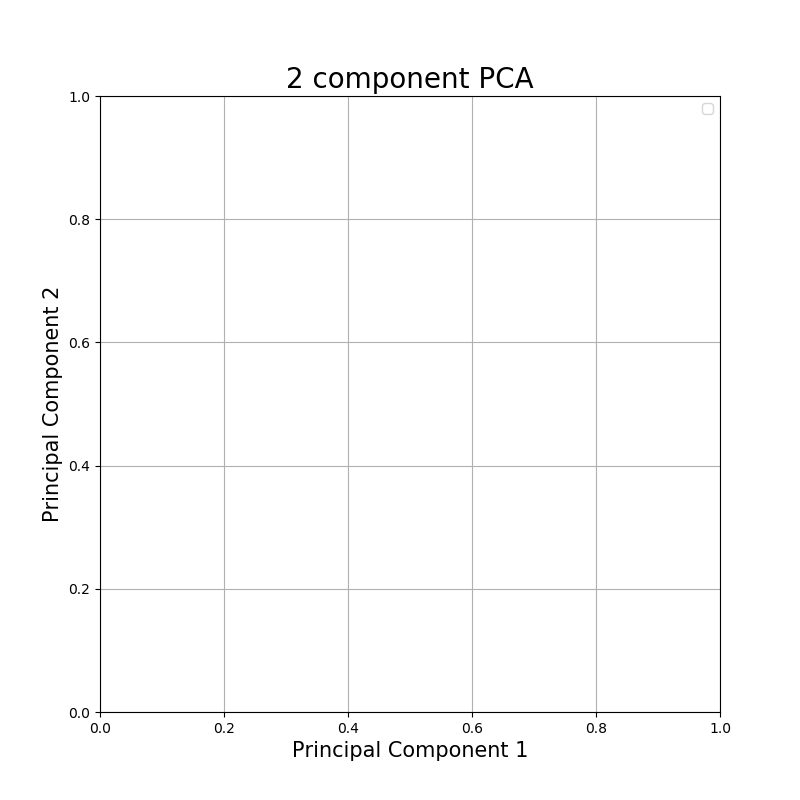

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
group = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65']
#colors = ['r', 'g', 'b']
#for group, color in zip(group,colors):
   # indicesToKeep = finalDf['group'] == group
    #ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               #, finalDf.loc[indicesToKeep, 'principal component 2']
              # , c = color
               #, s = 50)
ax.legend(group)
ax.grid()

In [133]:
#calculs
coord = acp.fit_transform(df)
#nombre de composantes calculées
print(acp.n_components) # 

None


In [134]:
print(acp.explained_variance_)
eigval = (3-1)/3*acp.explained_variance_
print(eigval)

[80787.86295748 30420.61343897   261.8464028 ]
[53858.57530498 20280.40895931   174.56426853]


In [135]:
plt.plot(df.arange(1,p+1),df.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'arange'

In [136]:
>>> import numpy as np
>>> from sklearn.decomposition import PCA
>>> X = df
>>> pca = PCA(n_components=3)
>>> pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
>>> print(pca.explained_variance_ratio_)  

>>> print(pca.singular_values_)  


  

[0.72474773 0.27290325 0.00234902]
[2238.04546499 1373.3455622   127.41458697]


In [137]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(df)

In [138]:
data = [df]

for name, col in zip(('group', 'xx', 'yy'), ):
    trace = dict(
        type='scatter',
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            #color=col,
            size=12,
            line=dict(
                #color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='projection-matrix')

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
df.to_csv(r'G:\drone\df.txt')

In [49]:
output.head


<bound method NDFrame.head of                                                                 path_x  \
1                                                                        
2018-10-11 10:18:15  G:\drone\surveys\neds\neds_20181011T101815_274...   
2018-10-11 10:18:15  G:\drone\surveys\neds\neds_20181011T101815_274...   
2018-10-11 10:18:17  G:\drone\surveys\neds\neds_20181011T101817_274...   
2018-10-11 10:18:17  G:\drone\surveys\neds\neds_20181011T101817_274...   
2018-10-11 10:18:20  G:\drone\surveys\neds\neds_20181011T101820_274...   
2018-10-11 10:18:20  G:\drone\surveys\neds\neds_20181011T101820_274...   
2018-10-11 10:18:22  G:\drone\surveys\neds\neds_20181011T101822_274...   
2018-10-11 10:18:22  G:\drone\surveys\neds\neds_20181011T101822_274...   
2018-10-11 10:19:54  G:\drone\surveys\neds\neds_20181011T101954_278...   
2018-10-11 10:19:56  G:\drone\surveys\neds\neds_20181011T101956_278...   
2018-10-11 10:19:59  G:\drone\surveys\neds\neds_20181011T101959_278...   
2018-10-

In [281]:
output.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\outputsurvey11.csv')

In [ ]:
df

In [ ]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in xrange(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap



In [ ]:
from sklearn.cluster import KMeans


kmeans.fit(df)



In [ ]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [ ]:
centroids[0,:]
idx

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

# colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['xx'], df['yy'], df['group', alpha=0.5, edgecolor='k',cmap='viridis',vmin=0,vmax=65)
# for idx, centroid in enumerate(centroids):
#     plt.scatter(centroids[idx,0],centroids[idx,1], c=idx,cmap='viridis',vmin=0,vmax=62)
plt.scatter(centroids[:,0],centroids[:,1])
output.plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)
plt.xlim(802520, 803682)
plt.ylim(-2.4317e+06, -2.43088e+06)
plt.show()

In [ ]:
print (colors)